git commit test

# My Data
Link: https://www.kaggle.com/johnsmith88/heart-disease-dataset

# Variables
1. age
    - age of patient
2. sex 
    - (1 = male, 0 = female)
3. cp
    - chest pain type (4 values) 
    - 0: asymptomatic
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: typical angina
4. trestbs: resting blood pressure 
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl 
7. restecg: resting electrocardiographic results
    - (values 0,1,2) 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina > 
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest > 
11. slope: the slope of the peak exercise ST segment > 
12. ca: number of major vessels 
    - (0-3) colored by flourosopy 
13. thal: thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target (0 = no heart disease, 1 = heart disease)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
data = pd.read_csv('data/heart.csv')

In [75]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Cleaning the Data for clear EDA
The data seems to be in good shape for modeling, however it could be a little confusing for EDA.  
We will rename column names and variables for clarity when performing EDA

### Renaming column names for clarity

In [76]:
data = data.rename(columns = {'cp':'chest_pain_type', 
                             'trestbps':'resting_bp',
                              'restecg':'resting_ecg',
                              'fbs':'fasting_bs',
                             'thalach': 'max_hr', 
                             })

In [77]:
data.head()

,age,sex,chest_pain_type,resting_bp,chol,fasting_bs,resting_ecg,max_hr,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
data.dtypes

age                  int64
sex                  int64
chest_pain_type      int64
resting_bp           int64
chol                 int64
fasting_bs           int64
resting_ecg          int64
max_hr               int64
exang                int64
oldpeak            float64
slope                int64
ca                   int64
thal                 int64
target               int64
dtype: object

In [55]:
data.shape

(1025, 14)

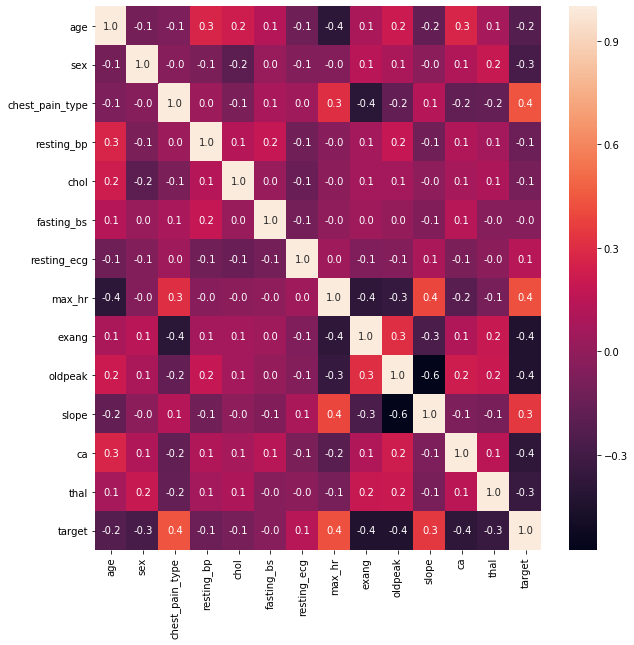

In [83]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, fmt = '.1f')
plt.show()

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

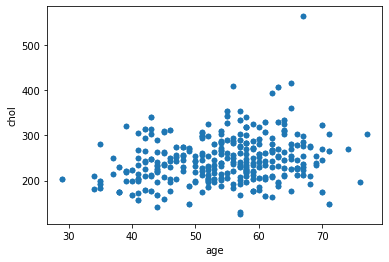

In [10]:
data.plot.scatter(x = 'age', y = 'chol')

Text(0.5, 1.0, 'Males vs Females')

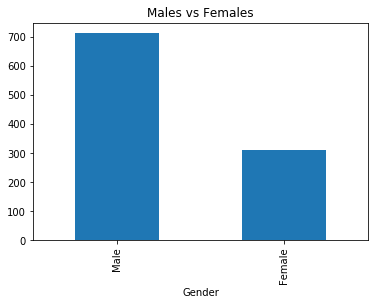

In [56]:
data.sex.value_counts().plot.bar();
plt.xlabel('Gender');
plt.ylabel('')
plt.title('Males vs Females')

**We have way more males than females**

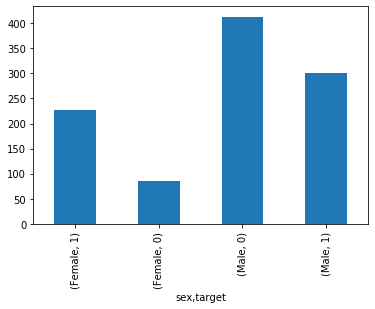

In [62]:
data.groupby('sex').target.value_counts().plot.bar()

Text(0.5, 1.0, 'Distribution of Age')

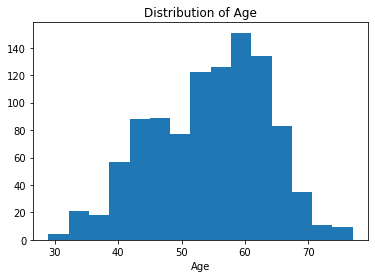

In [58]:
data.age.hist(bins = 15, grid = False);
plt.xlabel('Age')
plt.ylabel('')
plt.title('Distribution of Age')

**We have a unimodal, slightly skewed to the left dsitrubtion o age**  
**Most people in our data set are on the slightly older side**

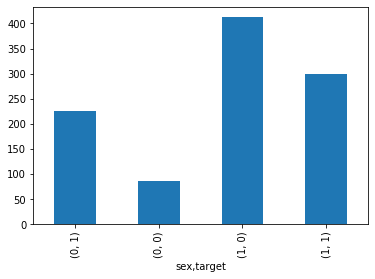

In [14]:
data.groupby('sex').target.value_counts().plot.bar()

In [15]:
import seaborn as sns

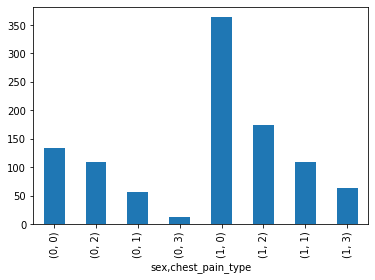

In [16]:
data.groupby('sex').chest_pain_type.value_counts().plot.bar()

In [17]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})  

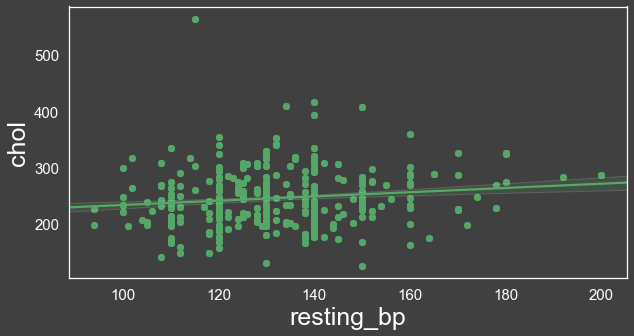

In [18]:
ax = sns.regplot(x='resting_bp', y='chol',data=data, color="g")

In [19]:
data.groupby('sex').target.value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

In [64]:
data.loc[data['sex'] == 'female'].target.value_counts().plot.bar()
plt.xlabel('')

TypeError: Empty 'DataFrame': no numeric data to plot